<a href="https://colab.research.google.com/github/mounikamarreddy/Lamarr-Tutorial---13.03.2024/blob/main/Lamarr_Tutorial_FLAN_T5_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Flan-T5 is an open-source LLM that’s available for commercial usage. Published by Google researchers, Flan-T5 is an encoder-decoder model pre-trained on a variety of language tasks. The model has been trained on supervised and unsupervised datasets with the goal of learning mappings between sequences of text, i.e., text-to-text.

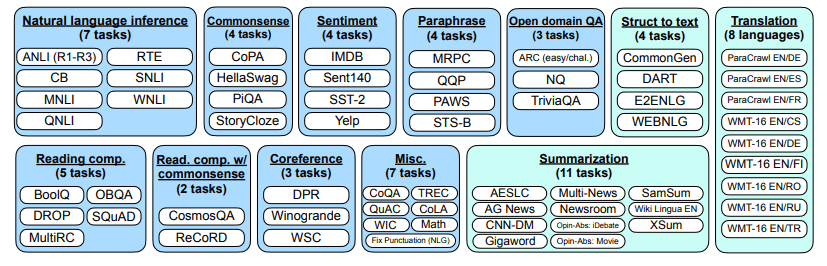

## Import the required libraries

In [1]:
import numpy as np
from IPython.core.debugger import set_trace
from scipy.io import loadmat
import pickle
import os
import sys
import nltk
from scipy import stats
from sklearn.model_selection import KFold
from scipy.stats import spearmanr, pearsonr
import spacy
import matplotlib.pyplot as plt
from tqdm import tqdm
from spacy import displacy
from collections import defaultdict
import torch
from sklearn.decomposition import PCA

# Load the Flan-t5 model and tokenizer using transformer library

In [2]:
from transformers import AutoModelWithLMHead, AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base", max_length=20)
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", output_hidden_states=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [6]:
# prediction of next event
inputs = tokenizer("'The sun is white, floods Clara's eyes.' What happens next?", return_tensors="pt")
#inputs = tokenizer("'wsc273:' [('{The sun is white, floods Clara's eyes.}', '{answer}')]")
outputs = model.generate(**inputs, max_length=10)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

['Clara looks at the camera.']


In [7]:
#function calling to generate output for different input tasks
def generate(input_text):
  input_ids = tokenizer(input_text, return_tensors="pt")
  output = model.generate(**input_ids, max_length=100)
  return tokenizer.decode(output[0], skip_special_tokens=True)

In [8]:
# translation task 1
input_text = """translate English to German: How old are you?"""
generate(input_text)

'Wie old sind Sie?'

In [9]:
# translation task 2
input_text = """translate English to French: How old are you?"""
generate(input_text)

' quelle âge êtes-vous?'

In [17]:
## translation task 3
input_text = """translate English to Spanish: How old are you?"""
generate(input_text)

'Cuánto es t?'

In [19]:
#question answering task
input_text = """Please answer the following question.
What is the boiling point of water?"""
generate(input_text)

'212 degrees celsius'

In [18]:
# Now we are asking the model to provide the reason for the generated output.
input_text = """
Answer the following question by reasoning step by step.
The cafeteria had 23 apples. If the used 20 for lunch and bougth 6 more, how many apples do they have?
"""
generate(input_text)

'The cafeteria had 23 - 20 = 9 apples. The cafeteria had 9 + 6 = 10 apples. Therefore, the answer is 10.'

In [ ]:
# Checking the Factual capabilities while answering
input_text = """
Q: Can Obama have a conversation with George Washington?
Give the rationale before answering
"""
generate(input_text)

'George Washington was born in 1789. Obama was born in 1803. So the final answer is no.'

In [20]:
# Testing the logical reasoning capabilities
input_text = """
Q: Answer the following yes/no question by
reasoning step-by-step.
Could a dandelion suffer from hepatitis?
A: Hepatitis only affects organisms with livers.
Dandelions don’t have a liver. The answer is no.
Q: Answer the following yes/no question by
reasoning step-by-step.
Can a monkey write a post?
A:
"""

generate(input_text)

'A monkey is a monkey. A post is a type of message. The answer is yes.'

In [ ]:
# Natural Langugae Inference Task
input_text = """
"Premise: Alberto is the CTO of a top NLP company. Hypothesis: Alberto is a tech expert. Does the premise entail the hypothesis?"
"""

generate(input_text)

'yes'

In [ ]:
#summarisation task
input_text = """
Summarize the following text: The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.
"""
generate(input_text)

'The Eiffel Tower is the tallest structure in France, and the tallest structure in the world.'

In [ ]:
# generating the question from the text
input_text = """
Generate a question for the following text: The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.
"""
generate(input_text)

'What is the height of the Eiffel Tower?'

In [ ]:
# generate answer by considering the input text and a question
input_text = """
The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930. It was the first structure to reach a height of 300 metres. Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.
Q: Which material is the tower made of?
"""
generate(input_text)

'Eiffel Tower'

In [ ]:
# Answer the following multiple choice question
input_text = """
Q: Which statement is sarcastic?
Options:
(A) Wow thats crazy, I've never seen a politician lying!
(B) Wow thats crazy, I've never seen Obama lying!
A: Let's think step by step.
"""
generate(input_text)

'Obama is a politician and he is lying. The answer: (B).'

In [ ]:
# sentence completion task
input_text = """
What happens next in this sentence?
This is Los Angles
"""
generate(input_text)

'a city in the north of the country.'

In [ ]:
# by considering the given characters, can it generates a question
input_text = """
thisigoing
Generate a correct sentence using the above characters:
"""
generate(input_text)

'this going'

In [ ]:
input_text = """
Write the following list of characters into a correctly formed sentence:
thisigoing
"""
generate(input_text)

'this going.'

In [ ]:
input_text = """
Continue writing next word in this sentence
This Los is Angles
"""
generate(input_text)

'a'

In [ ]:
input_text = """
Do She and completely point to the same thing in the following sentence?

She feels completely alone.

Options:
(A) No
(B) Yes
(C) Not Sure
"""
generate(input_text)

'(A)'

In [ ]:
input_text = """
Do feels and alone have the same meaning?

She feels completely alone.

Options:
(A) No
(B) Yes
(C) Not Sure
"""
generate(input_text)

'(B)'

In [ ]:
input_text = """
How does this following sentence end?
She feels completely
"""
generate(input_text)

'irritated that she has to go to the hospital.'

In [ ]:
input_text = """
How does this following sentence end?
She feels completely
"""
generate(input_text)

'irritated that she has to go to the hospital.'

In [ ]:
input_text = """
What is the next event?
She feels completely
"""
generate(input_text)

'irritated.'

In [ ]:
input_text = """
How does this text end?
She feels completely
"""
generate(input_text)

'irritated that she has to go to the hospital.'

In [ ]:
input_text = """
Find the right ending to this passage.
She feels completely
"""
generate(input_text)

'energized.'

In [ ]:
input_text = """
Can you tell me the next word to
She feels completely
"""
generate(input_text)

'frightened'

In [ ]:
input_text = """
Please answer the next word
She feels completely
"""
generate(input_text)

'smitten'

In [ ]:
input_text = """
Write a plausible word that ends with this sentence?
She feels completely
"""
generate(input_text)

'She feels completely ill'

In [ ]:
input_text = """
Concepts: Los This is Angeles
Write a sentence that includes all these words.
"""
generate(input_text)

'this is the city of los angeles.'

In [ ]:
input_text = """
Generate short a sentence that is linguistically acceptable
I going school
"""
generate(input_text)

"I'm going to school."

In [ ]:
input_text = """
Concepts: Los This is Angeles
Write a sentence about the following things:
"""
generate(input_text)

'this is a map of the city of los angeles.'

In [ ]:
input_text = """
Data: This is Los Angeles
What is a sentence that describe this data?
"""
generate(input_text)

'The city of Los Angeles is the largest city in the United States.'

In [ ]:
input_text = """
Identify the most important words in this sentence:

this is the city of los angeles.
"""
generate(input_text)

'city, city, lone'

In [ ]:
input_text = """
Next word:
She feels completely
"""
generate(input_text)

'stoked'

In [ ]:
input_text = """
Write down the next possible character
She feels completely
"""
generate(input_text)

'smitten'

In [ ]:
input_text = """
What is a shorter version of this?
She feels completely irritated
"""
generate(input_text)

"She's a snob"

In [ ]:
input_text = """
She feels completely irritated
Tell me who she is?
(A) brave
(B) timid
(C) Not Sure
"""
generate(input_text)

'(C)'

In [ ]:
input_text = """
What's a meaningful word that uses these characters?
amsunday
"""
generate(input_text)

'amsunday'

In [ ]:
input_text = """
Background: This is Los Angeles. And it's the height of summer. In a small bungalow off of La Cienega, Clara serves homemade chili and chips in red plastic bowls    wine in blue plastic. The colors don't match and the cups are too big to serve wine. You didn't get half the things on my list, she hisses at Gary as he passes. He shrugs. No one seems to mind but her. Did you have to buy a four hundred dollar bottle of Scotch. Gary waves away her upset. He seems distracted. Guilty of something. She can tell by the way he avoids her. Clara looks at her face in the hallway mirror. She's thirty three years old. She's slowly getting white hairs in her eyebrows. She feels completely alone. Grad students fill the low ceiling space, chewing big words and gesticulating emphatically. Gary's face looks up from the photo his parents have framed in expensive mahogany Elated, graduating, cap and gown and all. Toasts and more toasts To our Doctor of Philosophy. Amazing Art Prodigy.

Conext: In a small

Answer the next top-10 words by taking a quote from the article:

"""
generate(input_text)

'bungalow'

In [ ]:
input_text = """
Expand this sentence.
She feels completely smitten
"""
generate(input_text)

"She's a bit smitten with him."